In [1]:
from rbibm.utils.utils_data import query

from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx, get_model_by_id, get_adversarial_examples_by_id
from rbibm.plots.multi_plots import multi_plot, get_sorting_key_fn
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

In [2]:
import torch
torch.manual_seed(0)

In [3]:
name = "benchmark"
df = query(name, defense="None", task="gaussian_linear",  model_name=["gaussian", "multivariate_gaussian", "mixture_gaussian", "maf", "nsf"])

In [4]:
from rbibm.tasks import GaussianLinearTask

task = GaussianLinearTask(likelihood_scale=0.1)
prior = task.get_prior()
simulator = task.get_simulator()
post = task.get_true_posterior()

In [5]:
x_o = simulator(prior.sample((1,)))
posterior = post.condition(x_o)

In [6]:
post_cov = posterior.covariance_matrix
likelihood_prec = torch.linalg.inv(post.likelihood_cov)
linear_map = post.linear_map

m = likelihood_prec@linear_map@post_cov@linear_map.T@likelihood_prec
lam = torch.linalg.eigvalsh(m)[:,-1]

In [7]:
real_eps = df.groupby("eps").first().eps_abs

In [8]:
real_eps

eps
0.1    0.106268
0.2    0.212536
0.3    0.318804
0.5    0.531339
1.0    1.062679
2.0    2.125357
Name: eps_abs, dtype: float64

{'task': 'gaussian_linear', 'hue_order_fn': <function get_sorting_key_fn.<locals>.key_fn at 0x7f65dac2bb80>, 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'defense': 'None', 'hue': 'model_name', 'alpha': 0.5, 'min_clip': 0.001, 'main_value_adjust': None, 'N_train': 1000, 'loss': 'NLLLoss'}
{'task': 'gaussian_linear', 'hue_order_fn': <function get_sorting_key_fn.<locals>.key_fn at 0x7f65dac2bb80>, 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'defense': 'None', 'hue': 'model_name', 'alpha': 0.5, 'min_clip': 0.001, 'main_value_adjust': None, 'N_train': 10000, 'loss': 'NLLLoss'}
{'task': 'gaussian_linear', 'hue_order_fn': <function get_sorting_key_fn.<locals>.key_fn at 0x7f65dac2bb80>, 'model_name': ['gaussian', 'multivariate_gaussian', 'mixture_gaussian', 'maf', 'nsf'], 'defense': 'None', 'hue': 'model_name', 'alpha': 0.5, 'min_clip': 0.001, 'main_value_adjust': None, 'N_train': 100000, 'loss': 'NLLLoss'}


/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


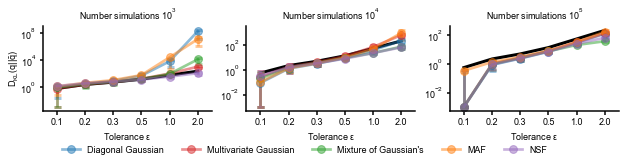

In [11]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "N_train", "loss", plot_rob_tolerance_plot, task="gaussian_linear", hue_order_fn = get_sorting_key_fn("model_name"),model_name=["gaussian", "multivariate_gaussian", "mixture_gaussian", "maf", "nsf"],  figsize_per_col=3., figsize_per_row=2., defense="None", hue="model_name",alpha=0.5, min_clip=1e-3, main_value_adjust=None)
    axes[0,0].plot(range(0,6),0.5* real_eps.values**2*lam.numpy(), lw=3, color="black", zorder=1)
    axes[0,1].plot(range(0,6),0.5* real_eps.values**2*lam.numpy(), lw=3, color="black",  zorder=1)
    axes[0,2].plot(range(0,6),0.5* real_eps.values**2*lam.numpy(),  lw=3, color="black",  zorder=1)
    axes[0,0].set_title(r"Number simulations $10^3$")
    axes[0,1].set_title(r"Number simulations $10^4$")
    axes[0,2].set_title(r"Number simulations $10^5$")
    axes[0][0].yaxis.set_label_coords(-0.13, 0.5)
    plt.minorticks_off()
    axes[0,0].set_ylabel(r"$D_{KL}(q||\tilde{q})$")
    fig.savefig("gaussian_linear.svg")
    plt.show()